<a href="https://colab.research.google.com/github/emir1187/Tasks/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

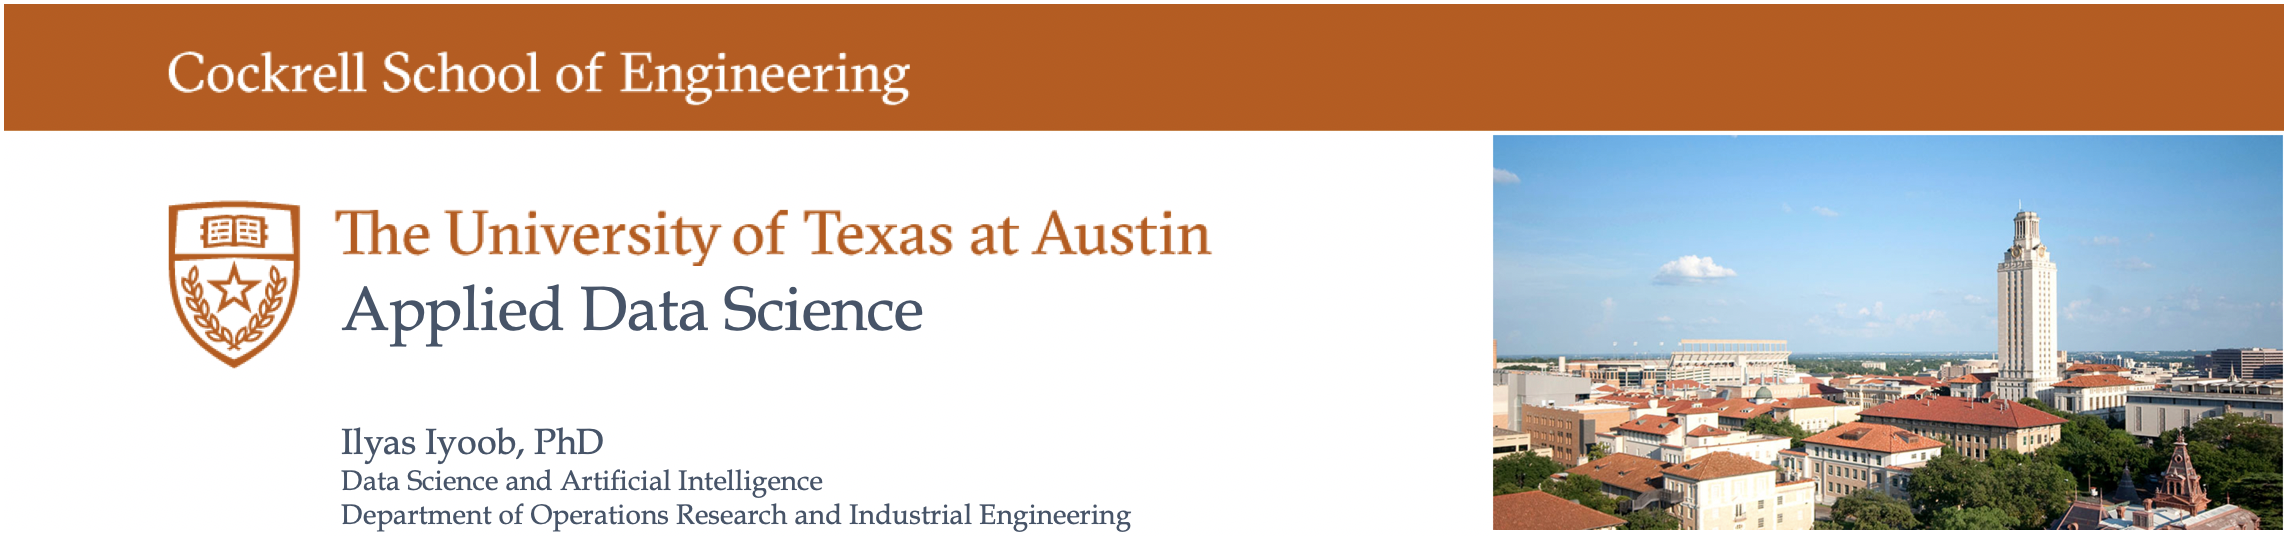

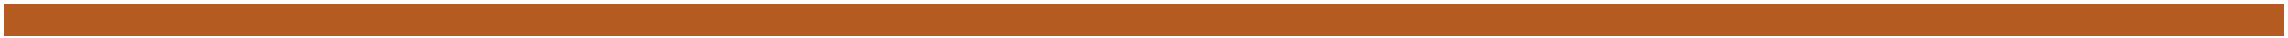

# IE 423 Forecasting Methods and Applications Final Exam
### Emirhan Candan 21902839

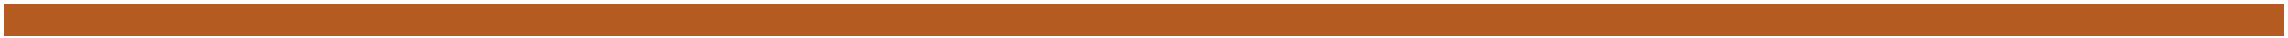

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Exploratory Data Analysis (EDA):

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/423final/online_shoppers_intention.csv', encoding='latin-1')

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

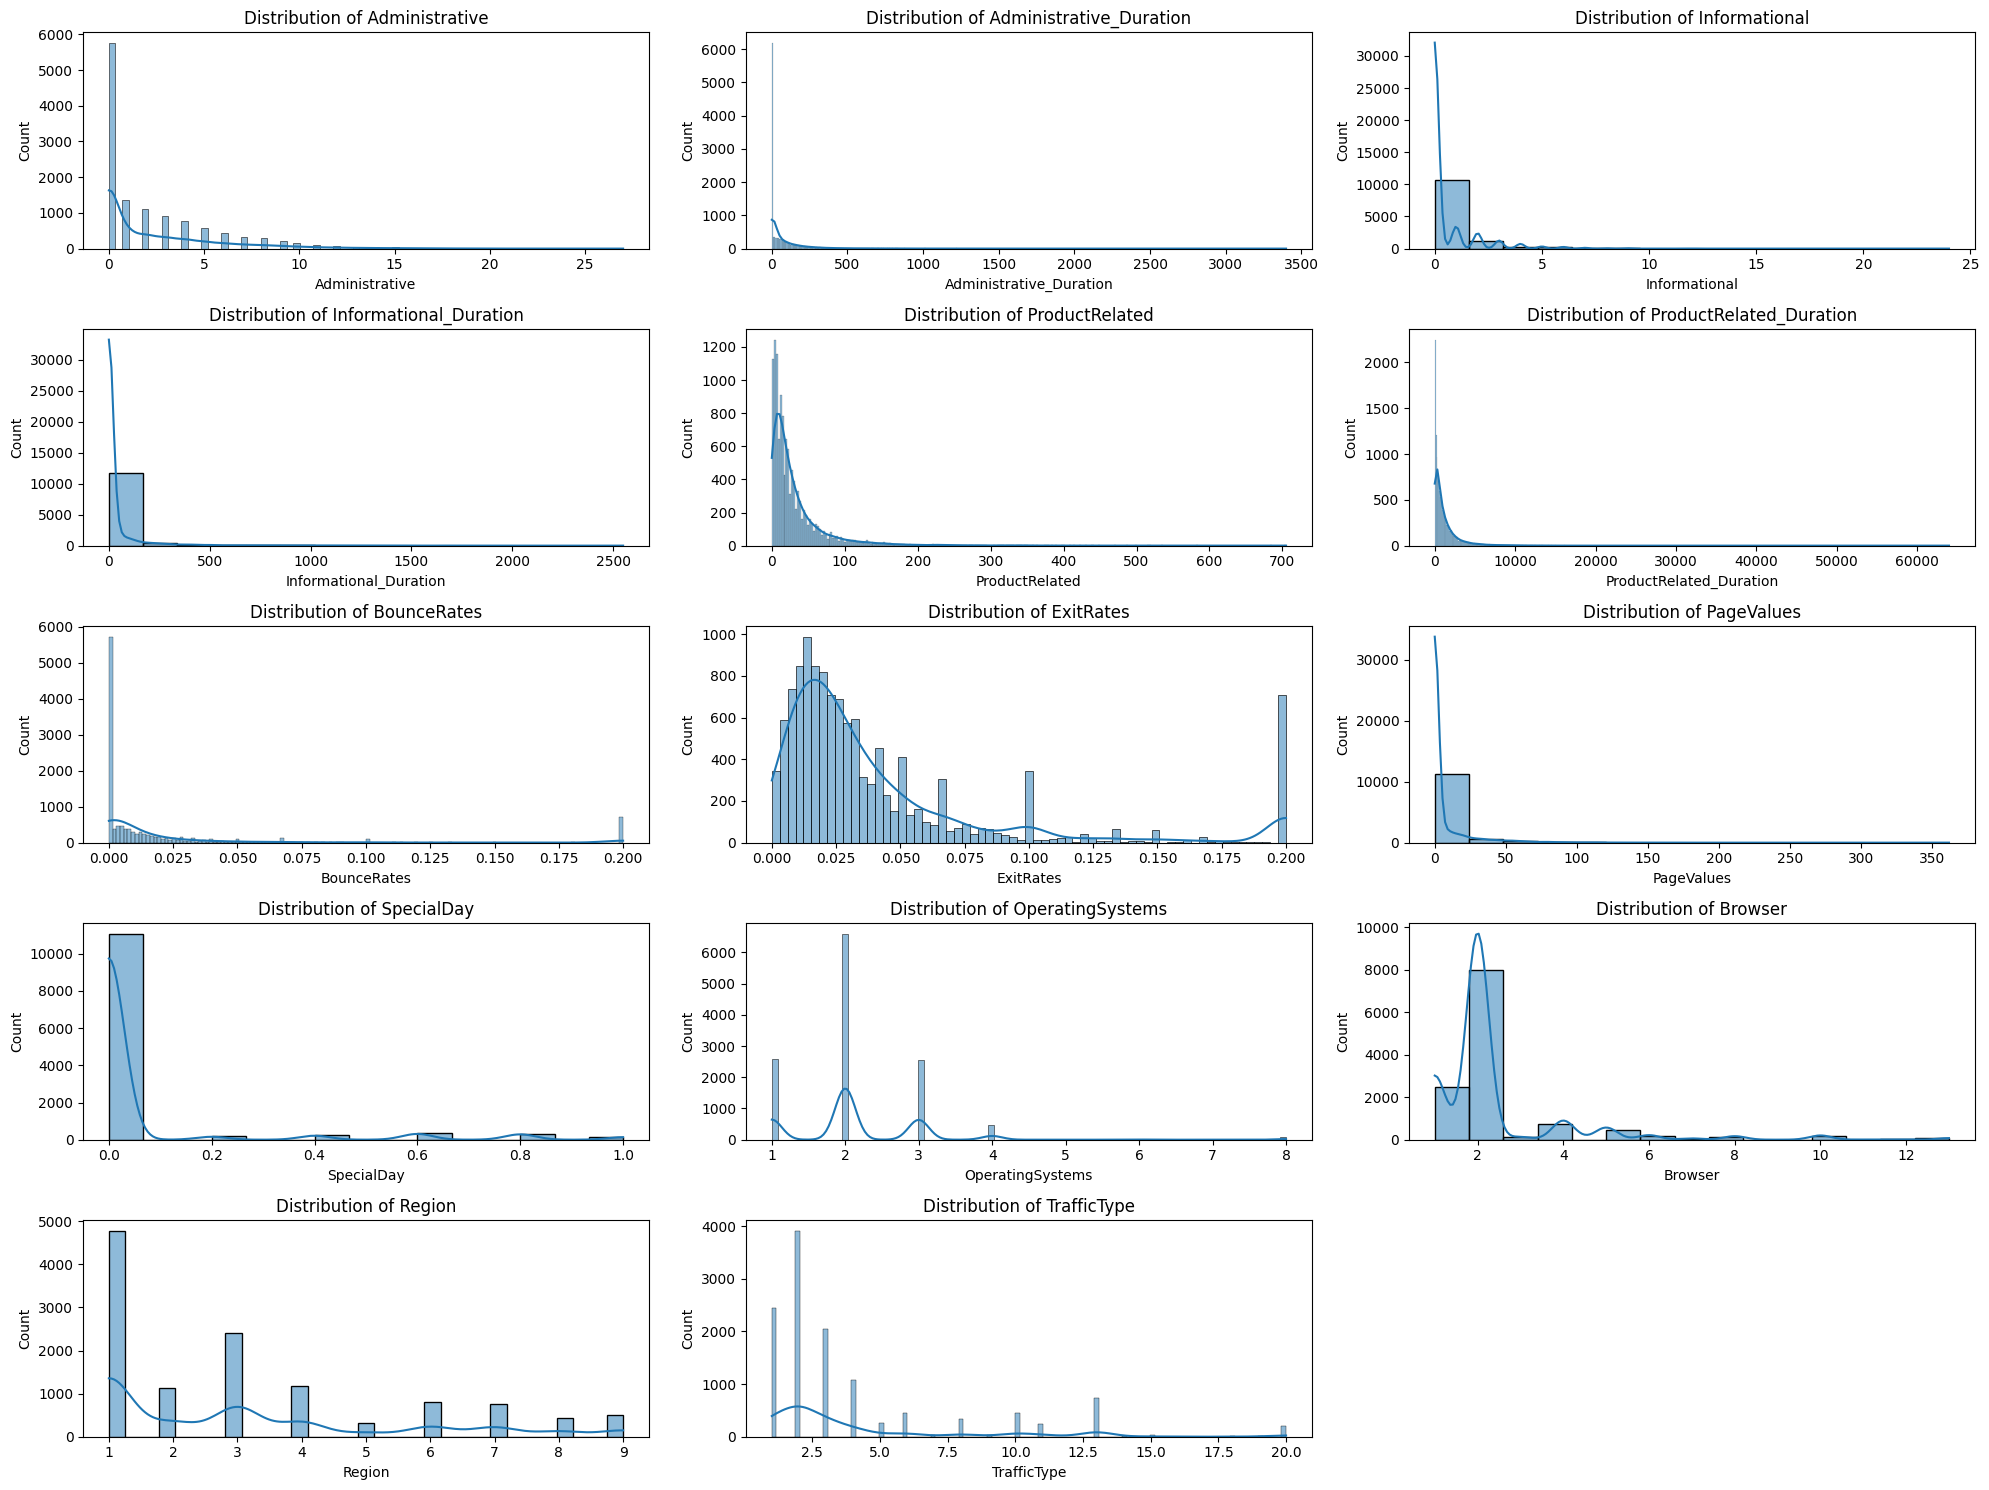

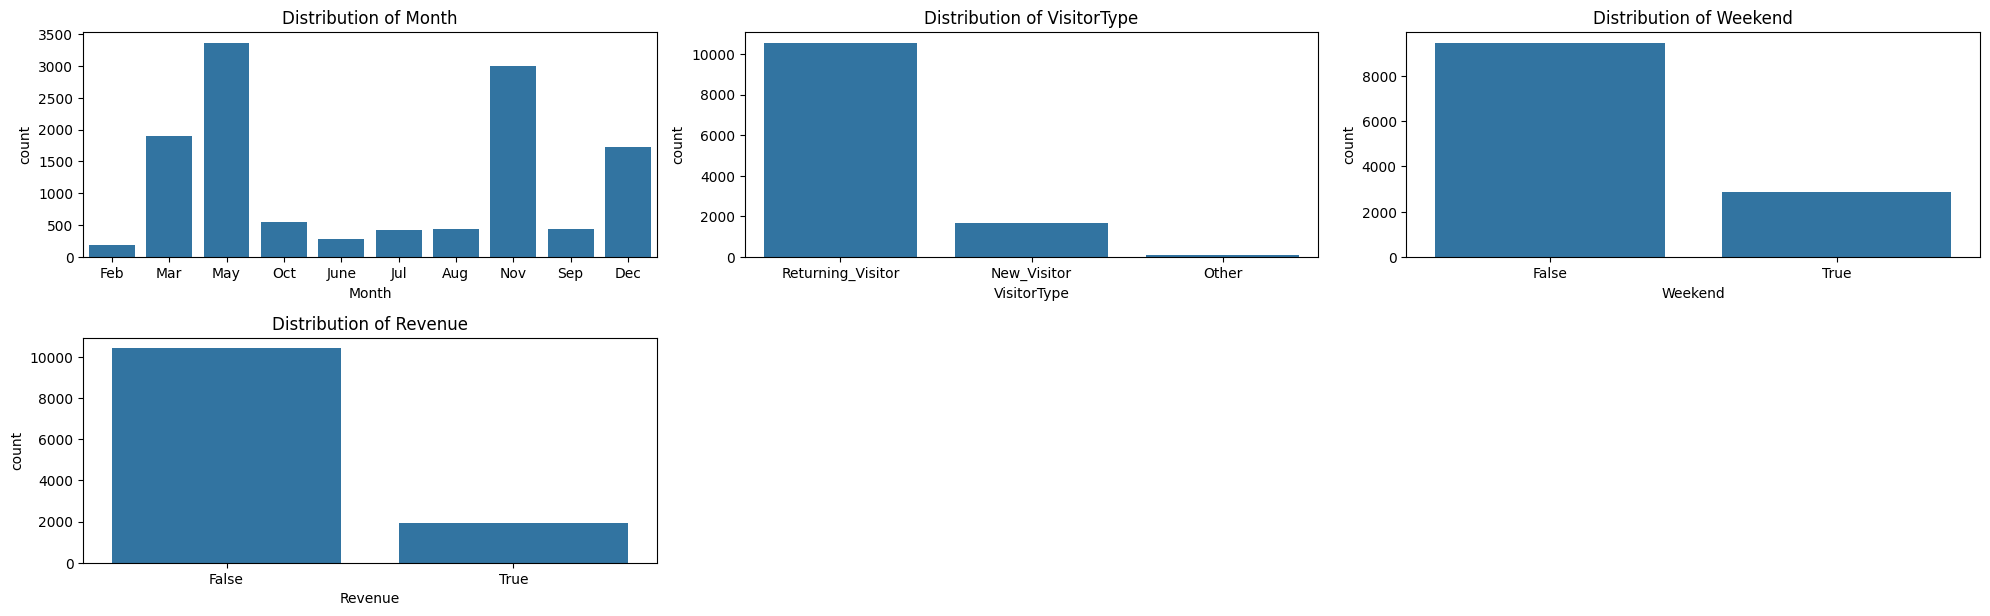

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


categorical_features = df.select_dtypes(include=['object', 'bool']).columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


When we analyze the frequency of data, I think it is not very evenly distributed so this may cause problem in our model. Our prediction may be worse to lower frequency variables.

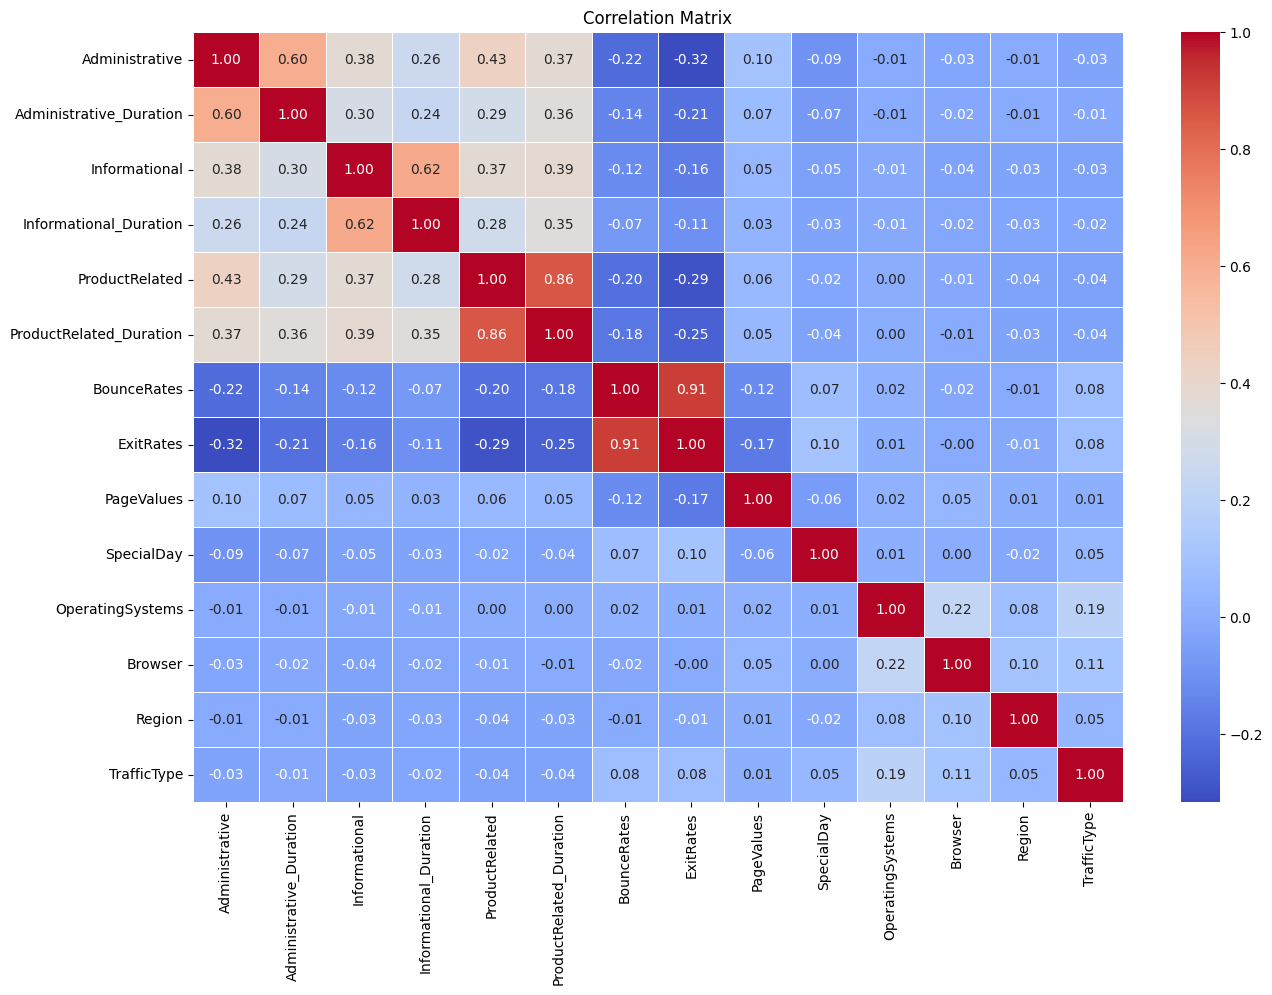

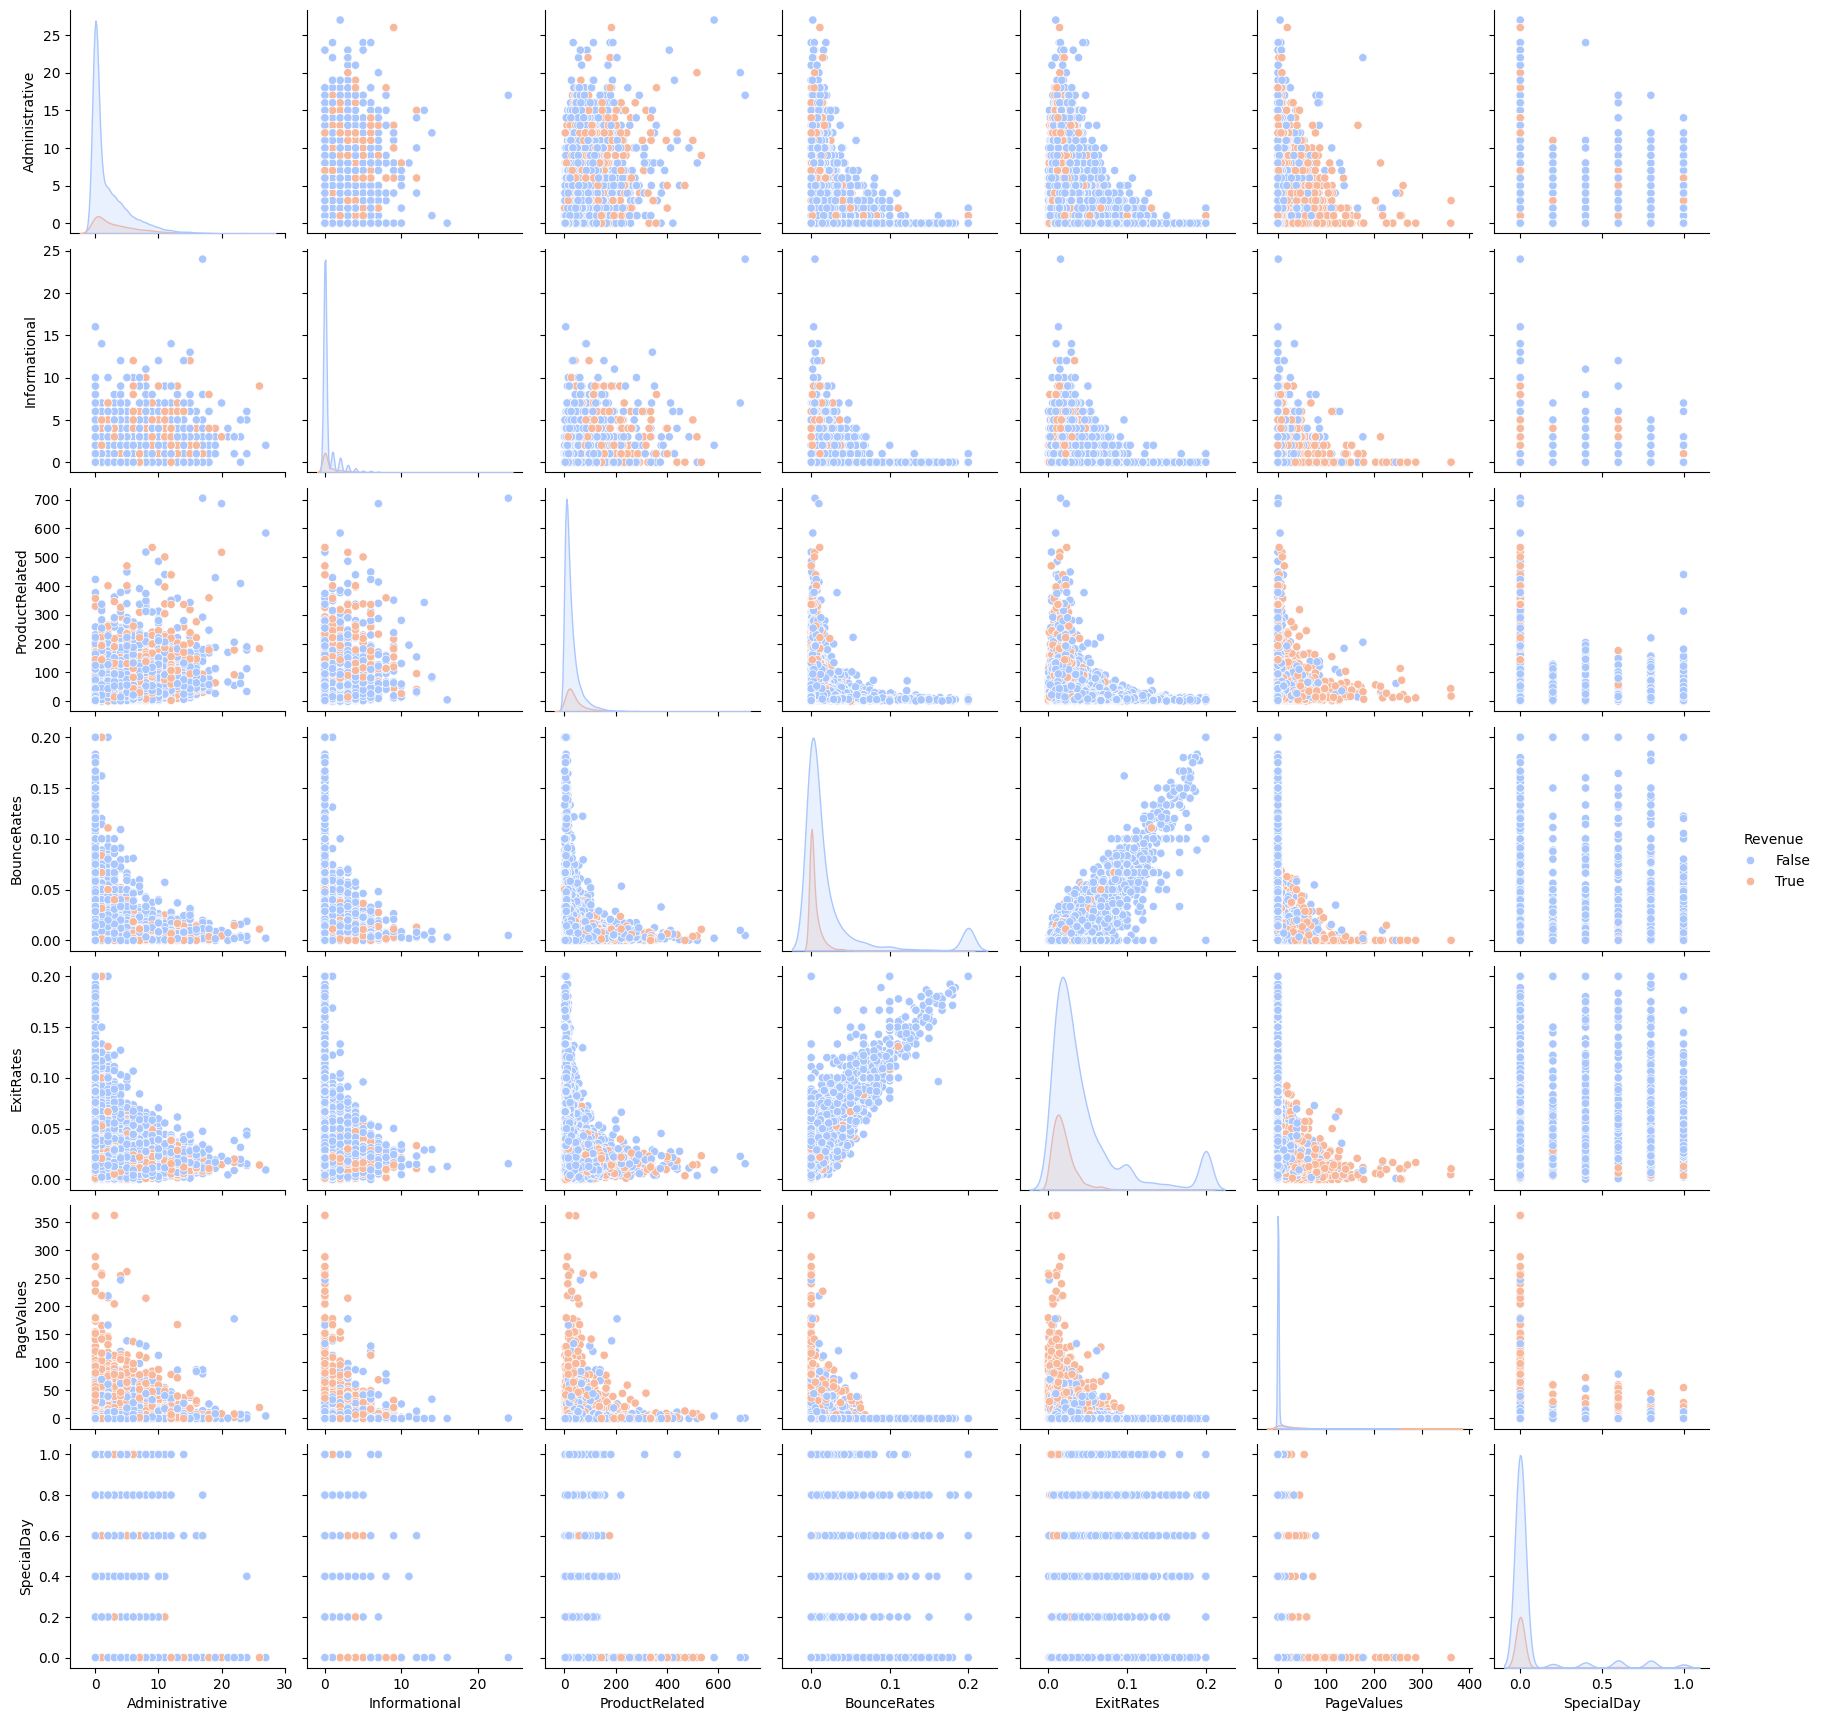

In [11]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
selected_features = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']
sns.pairplot(df[selected_features], hue='Revenue', palette='coolwarm')
plt.show()

Only in PageValues we see that a lot of revenue confirmation, and it is very normal since those pages only occurs when customer proceeds to payment. On the other hand, we see that some customers change their decision on the payment screen.

# 2. Data Preprocessing


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)




Missing Values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


We have no NaN value.

In [14]:
df_encoded = pd.get_dummies(df, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)

# Verify the new columns created
print("\nEncoded DataFrame Columns:")
print(df_encoded.columns)


Encoded DataFrame Columns:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_True'],
      dtype='object')


In [15]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Verify scaling
print("\nSummary Statistics after Scaling:")
print(df_encoded.describe())



Summary Statistics after Scaling:
       Administrative  Administrative_Duration  Informational  \
count    1.233000e+04             1.233000e+04   1.233000e+04   
mean    -2.996612e-17             6.281359e-17  -4.610172e-18   
std      1.000041e+00             1.000041e+00   1.000041e+00   
min     -6.969930e-01            -4.571914e-01  -3.964779e-01   
25%     -6.969930e-01            -4.571914e-01  -3.964779e-01   
50%     -3.959377e-01            -4.147639e-01  -3.964779e-01   
75%      5.072280e-01             7.035981e-02  -3.964779e-01   
max      7.431499e+00             1.876956e+01   1.849960e+01   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            1.233000e+04    1.233000e+04             1.233000e+04   
mean            -2.535595e-17    4.610172e-17            -8.298309e-17   
std              1.000041e+00    1.000041e+00             1.000041e+00   
min             -2.449305e-01   -7.134884e-01            -6.243475e-01   
25%      

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# 3. Feature Engineering

In [17]:
# Create new features
df_encoded['TotalDuration'] = df_encoded['Administrative_Duration'] + df_encoded['Informational_Duration'] + df_encoded['ProductRelated_Duration']
df_encoded['TotalPages'] = df_encoded['Administrative'] + df_encoded['Informational'] + df_encoded['ProductRelated']
df_encoded['AverageDurationPerPage'] = df_encoded['TotalDuration'] / df_encoded['TotalPages']

# Replace NaN values that might arise from division by zero
df_encoded['AverageDurationPerPage'].fillna(0, inplace=True)

# Display the first few rows to verify new features
print("\nDataFrame with New Features:")
print(df_encoded.head())



DataFrame with New Features:
   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_May  Month_Nov  \
0     3.667189   3.229316   -0.317178   -0.308821  ...      False      False   
1    -0.457683   1.171


Highly Correlated Features with 'Revenue':
Index(['Administrative', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Revenue', 'Month_Nov',
       'VisitorType_Returning_Visitor', 'TotalDuration', 'TotalPages'],
      dtype='object')


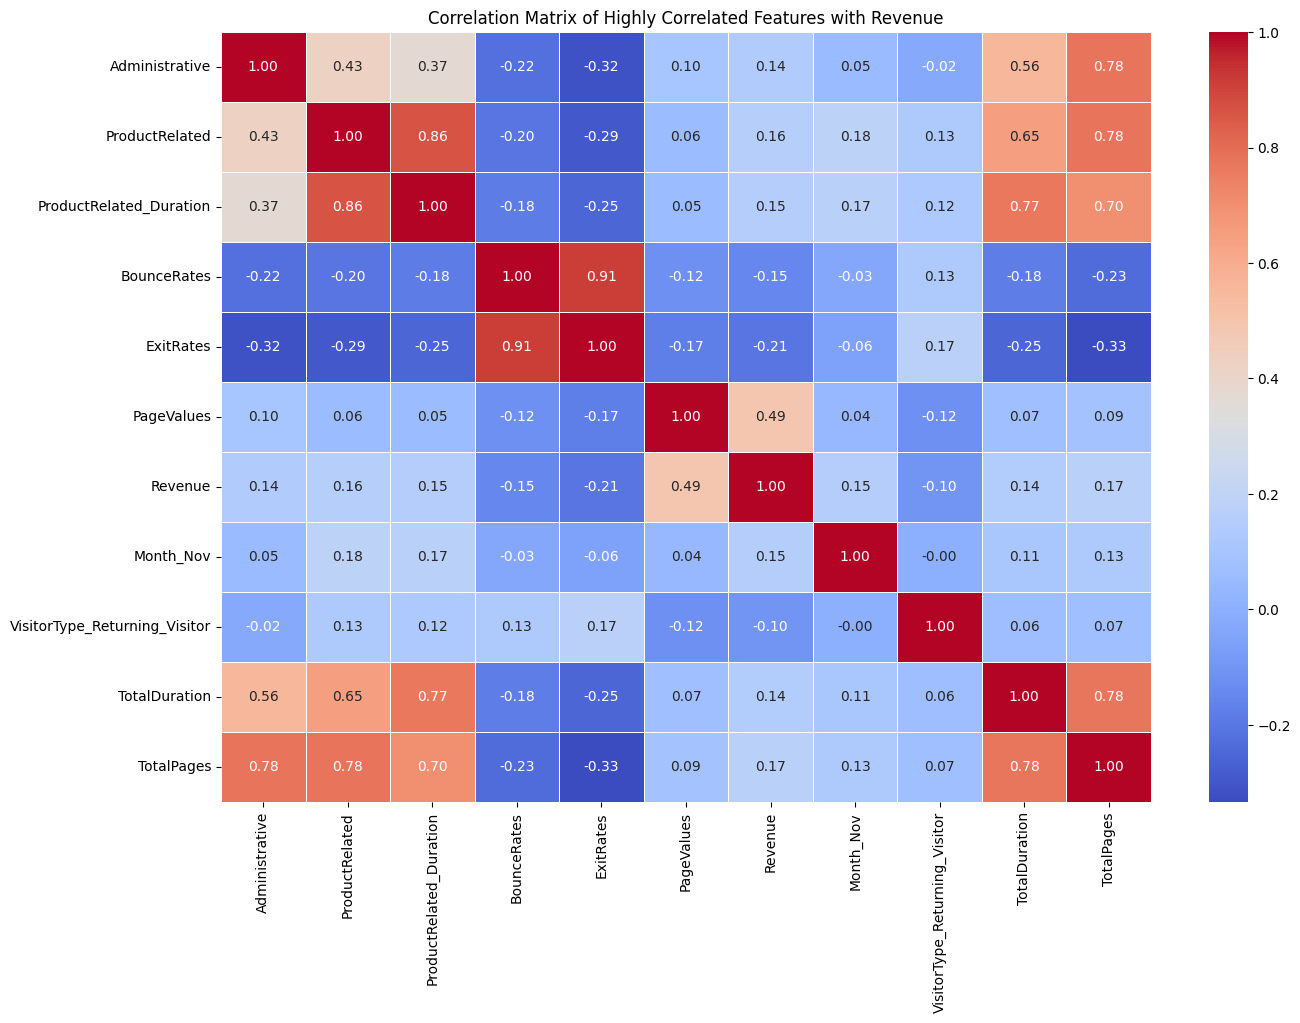

In [19]:
correlation_matrix = df_encoded.corr()

# Select highly correlated features with the target variable 'Revenue'
correlation_target = abs(correlation_matrix["Revenue"])
relevant_features = correlation_target[correlation_target > 0.1].index

print("\nHighly Correlated Features with 'Revenue':")
print(relevant_features)

# Visualize correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.loc[relevant_features, relevant_features], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Highly Correlated Features with Revenue')
plt.show()

Revenue does not have strong correlation with any other feature, so let our models decide which features we should use in our model. Since our feature engineering did not work as well.


Feature Importances:
PageValues                 0.351253
ExitRates                  0.073007
ProductRelated_Duration    0.064948
TotalDuration              0.059413
TotalPages                 0.054905
ProductRelated             0.051652
AverageDurationPerPage     0.051543
BounceRates                0.045460
Administrative_Duration    0.040549
Administrative             0.029081
dtype: float64


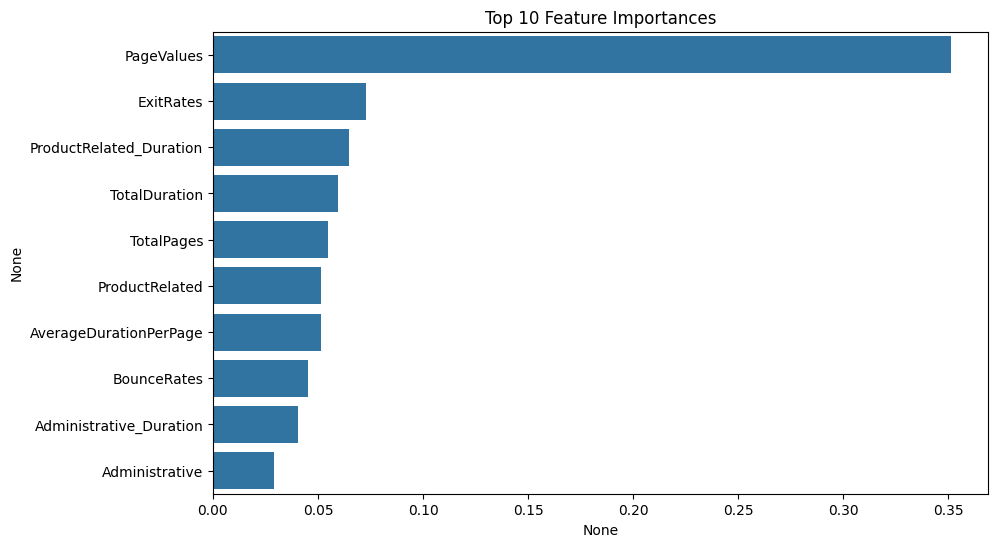

In [20]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']


model = RandomForestClassifier(random_state=42)


model.fit(X, y)


importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)


print("\nFeature Importances:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title('Top 10 Feature Importances')
plt.show()


PageValue is the key feature of our model.

# 4. Model Building

In [28]:

X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression

In [30]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)


y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]


accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
r2_logreg = r2_score(y_test, y_pred_proba_logreg)


print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1 Score: {f1_logreg:.4f}")
print(f"ROC-AUC: {roc_auc_logreg:.4f}")
print(f"R² Score: {r2_logreg:.4f}")


print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))



Logistic Regression Results:
Accuracy: 0.8832
Precision: 0.7638
Recall: 0.3600
F1 Score: 0.4894
ROC-AUC: 0.8902
R² Score: 0.3441

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.76      0.36      0.49       575

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)


y_pred_tree = decision_tree.predict(X_test_scaled)
y_pred_proba_tree = decision_tree.predict_proba(X_test_scaled)[:, 1]


accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
r2_tree = r2_score(y_test, y_pred_proba_tree)


print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")
print(f"ROC-AUC: {roc_auc_tree:.4f}")
print(f"R² Score: {r2_tree:.4f}")


print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))



Decision Tree Results:
Accuracy: 0.8589
Precision: 0.5453
Recall: 0.5548
F1 Score: 0.5500
ROC-AUC: 0.7348
R² Score: -0.0749

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       False       0.92      0.91      0.92      3124
        True       0.55      0.55      0.55       575

    accuracy                           0.86      3699
   macro avg       0.73      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699



## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)


y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
r2_rf = r2_score(y_test, y_pred_proba_rf)


print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.8959
Precision: 0.7262
Recall: 0.5304
F1 Score: 0.6131
ROC-AUC: 0.9185
R² Score: 0.4402

Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.73      0.53      0.61       575

    accuracy                           0.90      3699
   macro avg       0.82      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699



## Gradient Boosting

In [33]:

from sklearn.ensemble import GradientBoostingClassifier


gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)


y_pred_gb = gradient_boosting.predict(X_test)
y_pred_proba_gb = gradient_boosting.predict_proba(X_test)[:, 1]


accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
r2_gb = r2_score(y_test, y_pred_proba_gb)


print("\nGradient Boosting Results:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"ROC-AUC: {roc_auc_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Results:
Accuracy: 0.8929
Precision: 0.6861
Recall: 0.5739
F1 Score: 0.6250
ROC-AUC: 0.9292
R² Score: 0.4539

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      3124
        True       0.69      0.57      0.62       575

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699



# Results Comparison

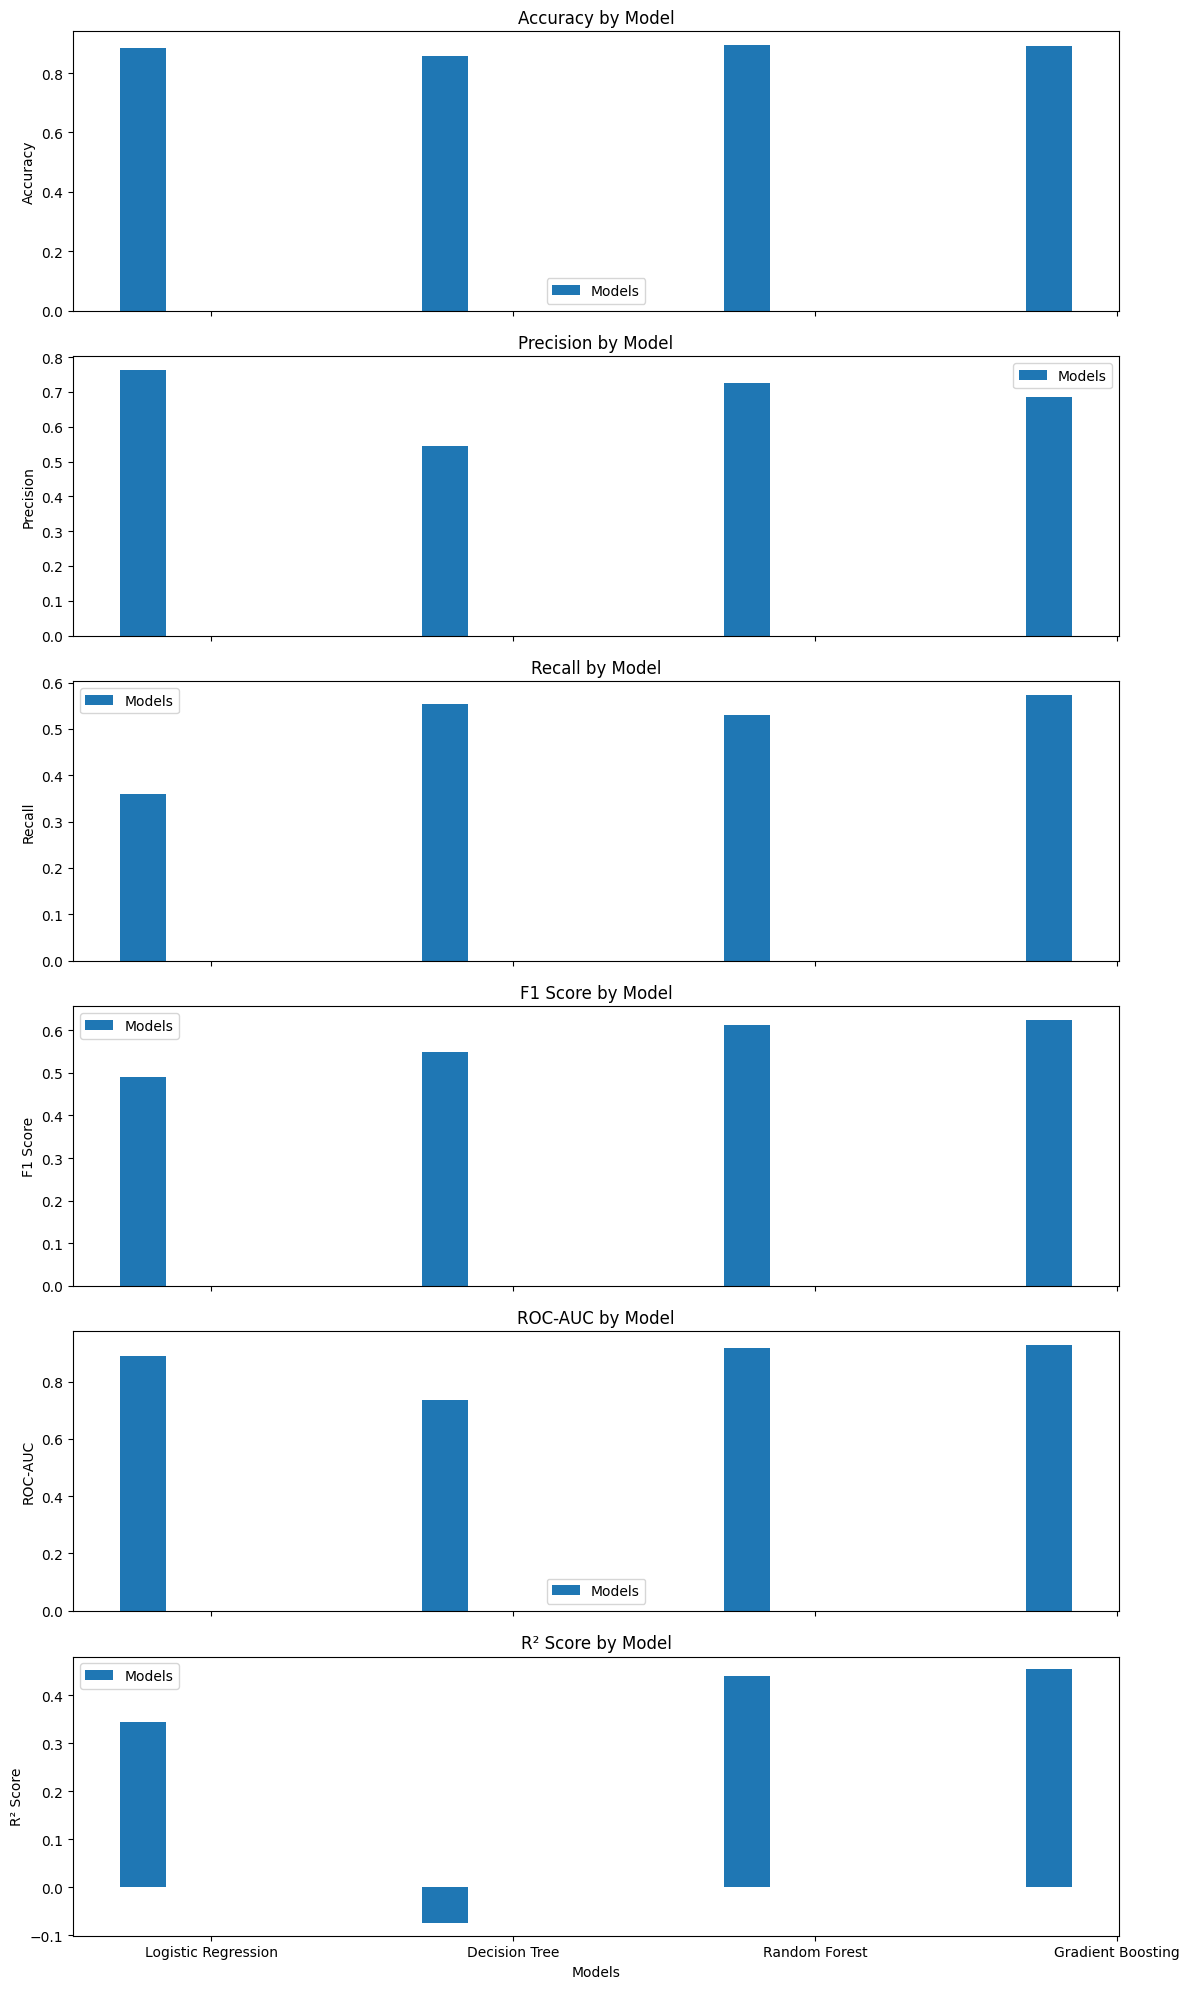

In [40]:
import numpy as np


models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
metrics = {
    'Accuracy': [accuracy_logreg, accuracy_tree, accuracy_rf, accuracy_gb],
    'Precision': [precision_logreg, precision_tree, precision_rf, precision_gb],
    'Recall': [recall_logreg, recall_tree, recall_rf, recall_gb],
    'F1 Score': [f1_logreg, f1_tree, f1_rf, f1_gb],
    'ROC-AUC': [roc_auc_logreg, roc_auc_tree, roc_auc_rf, roc_auc_gb],
    'R² Score': [r2_logreg, r2_tree, r2_rf, r2_gb]
}

import matplotlib.pyplot as plt


n_metrics = len(metrics)
x = np.arange(len(models))
width = 0.15

fig, axes = plt.subplots(n_metrics, 1, figsize=(12, 20), sharex=True)

for i, (metric, values) in enumerate(metrics.items()):
    axes[i].bar(x - width * 1.5, values, width, label='Models')
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'{metric} by Model')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(models)
    axes[i].legend()


axes[-1].set_xlabel('Models')
fig.tight_layout()

plt.show()


Random Forest and Gradient Boosting look better compared to others.

# 5. Model Optimization

In [41]:
from sklearn.model_selection import GridSearchCV


param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

param_grid_tree = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')


grid_search_lr.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)


print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

print("Best parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best score for Decision Tree:", grid_search_tree.best_score_)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.8846030028160208
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best score for Decision Tree: 0.880199959608186
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.9060374355626438
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best score for Gradient Boosting: 0.9053425219118882


90% score is very well for prediction, we will test with test data to check any overfitting.

In [42]:
from sklearn.model_selection import cross_val_score

# Evaluate models with cross-validation
cv_scores_lr = cross_val_score(LogisticRegression(**grid_search_lr.best_params_), X_train, y_train, cv=5, scoring='accuracy')
cv_scores_tree = cross_val_score(DecisionTreeClassifier(**grid_search_tree.best_params_), X_train, y_train, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(RandomForestClassifier(**grid_search_rf.best_params_), X_train, y_train, cv=5, scoring='accuracy')
cv_scores_gb = cross_val_score(GradientBoostingClassifier(**grid_search_gb.best_params_), X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores for Logistic Regression:", cv_scores_lr)
print("Mean cross-validation score for Logistic Regression:", np.mean(cv_scores_lr))

print("Cross-validation scores for Decision Tree:", cv_scores_tree)
print("Mean cross-validation score for Decision Tree:", np.mean(cv_scores_tree))

print("Cross-validation scores for Random Forest:", cv_scores_rf)
print("Mean cross-validation score for Random Forest:", np.mean(cv_scores_rf))

print("Cross-validation scores for Gradient Boosting:", cv_scores_gb)
print("Mean cross-validation score for Gradient Boosting:", np.mean(cv_scores_gb))


Cross-validation scores for Logistic Regression: [0.8760857  0.88586327 0.89571263 0.88006952 0.88528389]
Mean cross-validation score for Logistic Regression: 0.8846030028160208
Cross-validation scores for Decision Tree: [0.87203243 0.89397451 0.87775203 0.86616454 0.88586327]
Mean cross-validation score for Decision Tree: 0.8791573542959243
Cross-validation scores for Random Forest: [0.89577302 0.90498262 0.91193511 0.90266512 0.90034762]
Mean cross-validation score for Random Forest: 0.9031406983758062
Cross-validation scores for Gradient Boosting: [0.8940359  0.91193511 0.9165701  0.90208575 0.90208575]
Mean cross-validation score for Gradient Boosting: 0.9053425219118882


Cross-validation scores look promising.

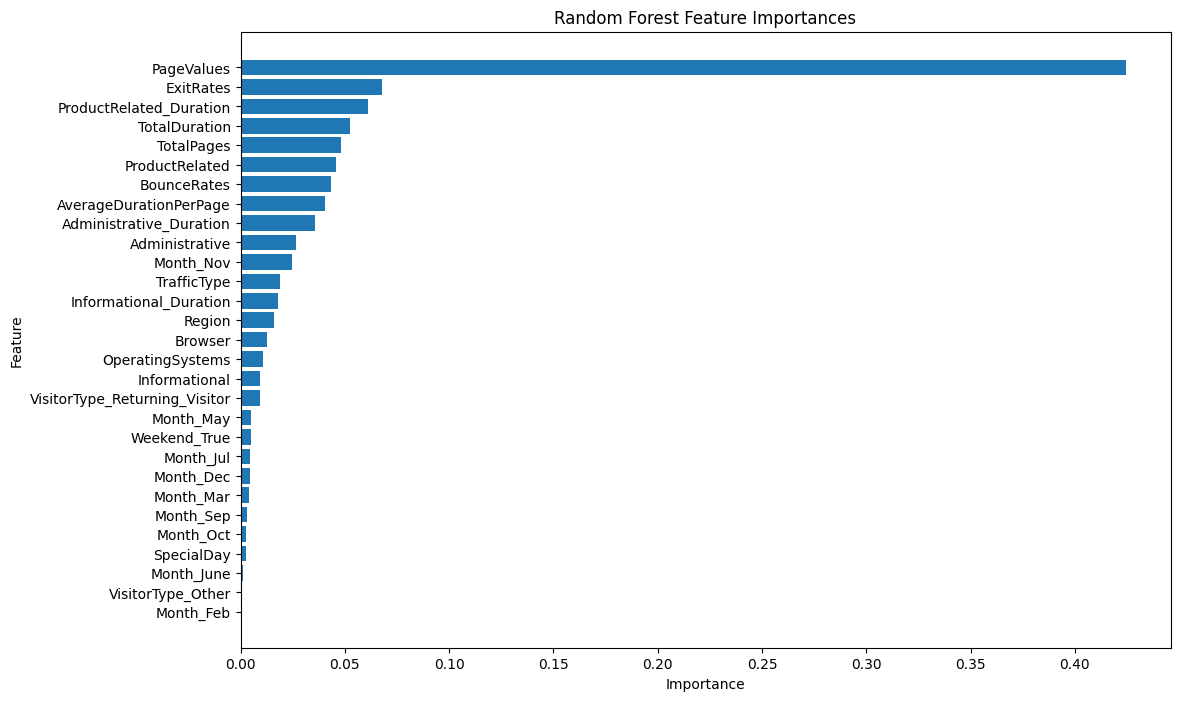

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


X = df_encoded.drop(columns=['Revenue'])
y = df_encoded['Revenue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestClassifier(
    max_depth=30,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)
rf.fit(X_train_scaled, y_train)


importances = rf.feature_importances_


features = X.columns


importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()


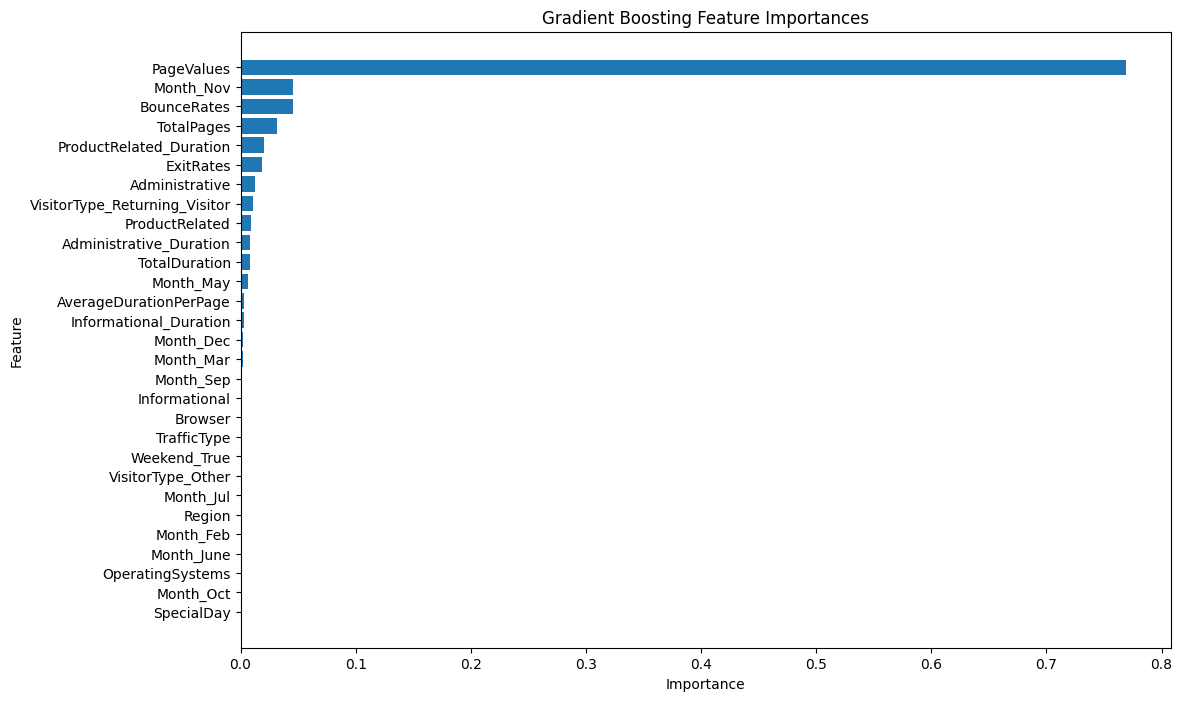

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_encoded.drop(columns=['Revenue'])
y = df_encoded['Revenue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
gb.fit(X_train_scaled, y_train)


importances = gb.feature_importances_


features = X.columns


importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importances')
plt.gca().invert_yaxis()
plt.show()


Interestingly, we see that November in important features as categorical feature. This is an indicator of how campaigns in November affects the sales.

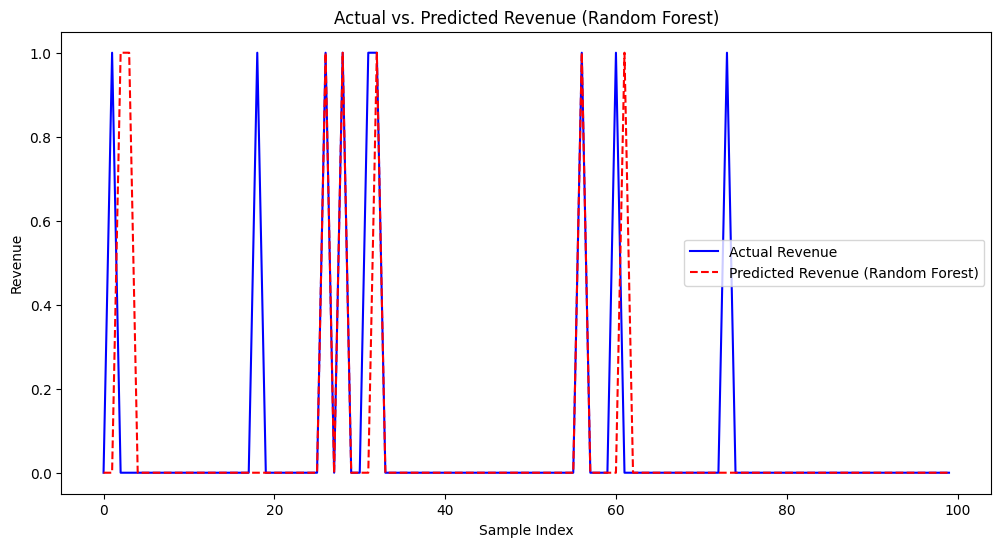

In [50]:
import matplotlib.pyplot as plt

y_pred_rf = rf.predict(X_test_scaled)


plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Revenue', color='blue')
plt.plot(y_pred_rf[:100], label='Predicted Revenue (Random Forest)', color='red', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue (Random Forest)')
plt.legend()
plt.show()


Forecast looks normal, no overfitting.

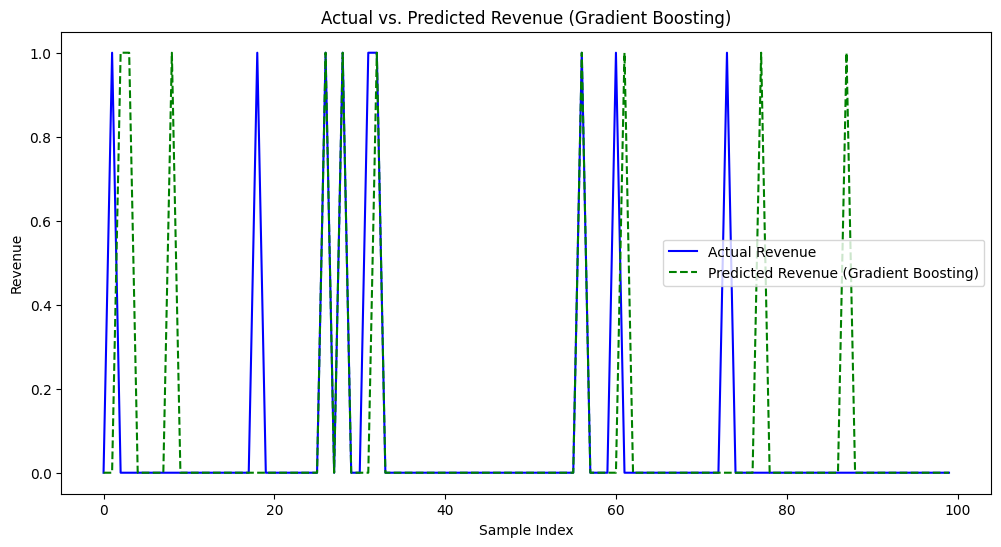

In [51]:
import matplotlib.pyplot as plt

# Make predictions using the already fitted Gradient Boosting model
y_pred_gb = gb.predict(X_test_scaled)

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Revenue', color='blue')
plt.plot(y_pred_gb[:100], label='Predicted Revenue (Gradient Boosting)', color='green', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue (Gradient Boosting)')
plt.legend()
plt.show()


Forecast looks normal but a little bit off from random forest one, no overfitting.

# Insights
## Model Comparison:

* Random Forest and Gradient Boosting performed the best, with the highest best
scores and cross-validation scores, indicating strong predictive power.

* Logistic Regression performed well but slightly less effective compared to Random Forest and Gradient Boosting.

* Decision Tree had the lowest performance among the models tested.

# Feature Importance:

* Random Forest: Shows that multiple features have significant importance in predicting the target variable, suggesting that the model benefits from the interactions among various features.

* Gradient Boosting: Shows that it heavily relies on a few key features. This indicates that the model focuses on a subset of features that might carry more predictive power.

## Model Stability:

The consistency of performance across cross-validation folds is a good indicator of model stability. Both Random Forest and Gradient Boosting show relatively high and consistent performance, suggesting they are robust models for this dataset.

## Best Parameters:

The best parameters obtained from Grid Search indicate that fine-tuning hyperparameters can significantly impact model performance. For instance, Random Forest benefits from a larger max_depth and n_estimators, while Gradient Boosting benefits from a moderate learning_rate and max_depth.


# Feature Importance:

Given the Random Forest and Gradient Boosting models are performing the best, exploring feature importance from these models could provide insights into which features are most influential for predicting purchasing intention. This could help in feature selection and understanding customer behavior better.

# Model Deployment:

Random Forest and Gradient Boosting are recommended for deployment due to their high accuracy and robustness. Logistic Regression can also be considered for simpler and faster predictions if needed.

# Customer Targeting:

Use the insights gained from the model to improve customer targeting strategies. For example, if certain features (e.g., PageValues, ProductRelated_Duration) are highly predictive of purchases, you can focus on these aspects to increase conversion rates.

# Limitations and Potential Improvements

* Data Quality and Completeness:

Ensure the data is clean and comprehensive. Missing values, if present, should be handled appropriately. Further, investigate if there are any other relevant features that could improve model performance.
Feature Engineering:

Experiment with additional feature engineering techniques to capture more complex relationships in the data. For example, creating interaction terms or domain-specific features might reveal hidden patterns.
Model Complexity:

Consider evaluating more complex models or ensemble methods if the current models do not meet performance expectations. Neural networks, for example, could be explored for further improvement.
Model Evaluation:

While accuracy is a crucial metric, also consider evaluating models using other metrics like precision, recall, and F1-score, especially if there is class imbalance.

